# Model Evaluation and Improvement

In [187]:
 from sklearn.datasets import make_blobs
 from sklearn.linear_model import LogisticRegression
 from sklearn.model_selection import train_test_split
 # create a synthetic dataset
 X, y = make_blobs(random_state=0)
 # split data and labels into a training and a test set
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
 # instantiate a model and fit it to the training set
 logreg = LogisticRegression().fit(X_train, y_train)
 # evaluate the model on the test set
 print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


##  Cross-Validation

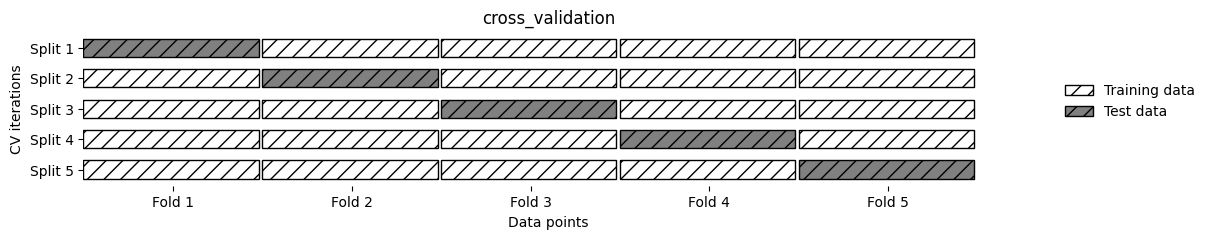

In [188]:
import mglearn
mglearn.plots.plot_cross_validation()

### Cross-Validation in scikit-learn

In [189]:
 from sklearn.model_selection import cross_val_score
 from sklearn.datasets import load_iris
 from sklearn.linear_model import LogisticRegression
 iris = load_iris()
 logreg = LogisticRegression(max_iter=1000)
 scores = cross_val_score(logreg, iris.data, iris.target)
 print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [190]:
 scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
 print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [191]:
 print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


##  Stratified k-Fold Cross-Validation and Other Strategies

In [192]:
 from sklearn.datasets import load_iris
 iris = load_iris()
 print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


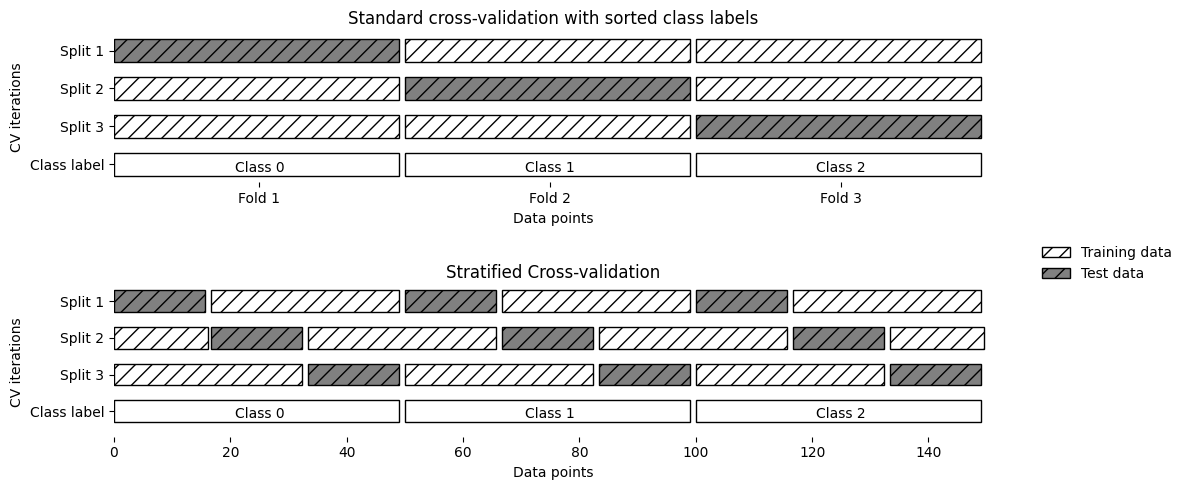

In [193]:
 mglearn.plots.plot_stratified_cross_validation()

###  More control over cross-validation

In [194]:
 from sklearn.model_selection import KFold
 kfold = KFold(n_splits=5)

In [195]:
 print("Cross-validation scores:\n{}".format(
 cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [196]:
 kfold = KFold(n_splits=3)
 print("Cross-validation scores:\n{}".format(
 cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [197]:
 kfold = KFold(n_splits=3, shuffle=True, random_state=0)
 print("Cross-validation scores:\n{}".format(
 cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


### Leave-one-out cross-validation

In [198]:
 from sklearn.model_selection import LeaveOneOut
 loo = LeaveOneOut()
 scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
 print("Number of cv iterations: ", len(scores))
 print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


### Shuffle-split cross-validation

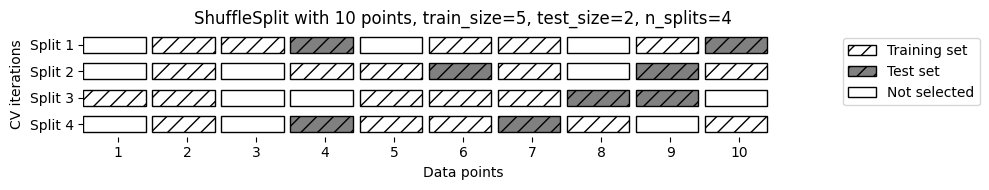

In [199]:
 mglearn.plots.plot_shuffle_split()

In [200]:
 from sklearn.model_selection import ShuffleSplit
 shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
 scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
 print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.93333333 0.96       0.97333333 0.90666667 0.94666667 0.98666667
 0.98666667 0.94666667 0.94666667 0.94666667]


### Cross-validation with groups

In [201]:
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# Create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)

# Define model
logreg = LogisticRegression()

# Define group membership
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

# Use GroupKFold with cross_val_score
scores = cross_val_score(logreg, X, y, cv=GroupKFold(n_splits=3), groups=groups)

print("Cross-validation scores:\n{}".format(scores))


Cross-validation scores:
[0.75       0.6        0.66666667]


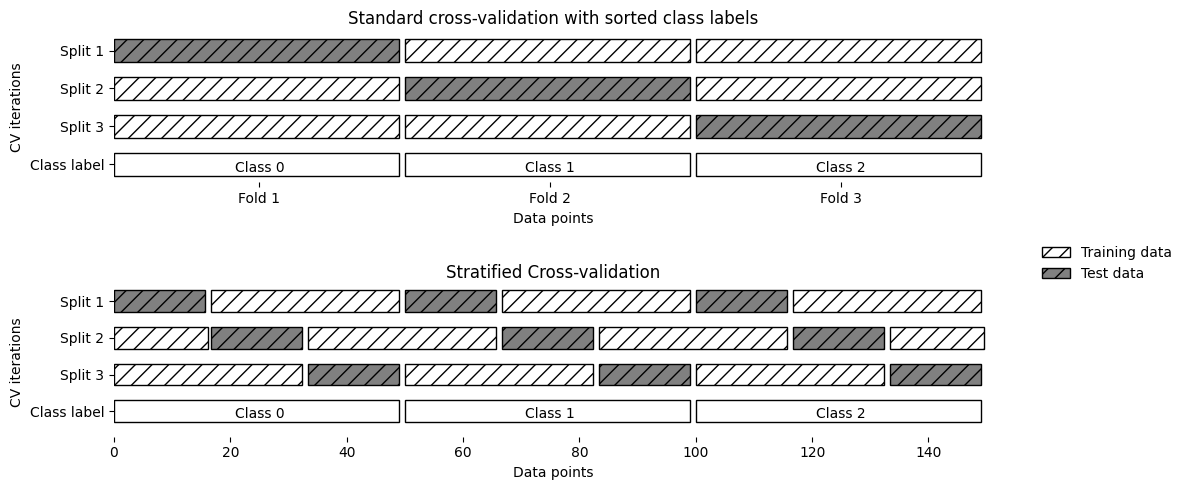

In [202]:
mglearn.plots.plot_stratified_cross_validation()

## Grid Search

In [203]:
 # naive grid search implementation
 from sklearn.svm import SVC
 X_train, X_test, y_train, y_test = train_test_split(
 iris.data, iris.target, random_state=0)
 print("Size of training set: {}   size of test set: {}".format(
 X_train.shape[0], X_test.shape[0]))
 best_score = 0
 for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
   # for each combination of parameters, train an SVC
   svm = SVC(gamma=gamma, C=C)
   svm.fit(X_train, y_train)
   # evaluate the SVC on the test set
   score = svm.score(X_test, y_test)
   # if we got a better score, store the score and parameters
   if score > best_score:
    best_score = score
    best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
 print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


##  The Danger of Overfitting the Parameters and the Validation Set

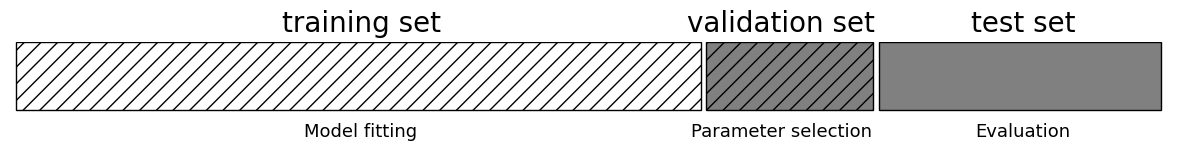

In [204]:
mglearn.plots.plot_threefold_split()

In [205]:
 # split data into train+validation set and test set
 X_trainval, X_test, y_trainval, y_test = train_test_split(
 iris.data, iris.target, random_state=0)
 # split train+validation set into training and validation sets
 X_train, X_valid, y_train, y_valid = train_test_split(
 X_trainval, y_trainval, random_state=1)
 print("Size of training set: {}   size of validation set: {}   size of test set:"
 " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
 best_score = 0
 for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
 # for each combination of parameters, train an SVC
   svm = SVC(gamma=gamma, C=C)
   svm.fit(X_train, y_train)
 # evaluate the SVC on the test set
   score = svm.score(X_valid, y_valid)
 # if we got a better score, store the score and parameters
   if score > best_score:
    best_score = score
    best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set,
 # and evaluate it on the test set
 svm = SVC(**best_parameters)
 svm.fit(X_trainval, y_trainval)
 test_score = svm.score(X_test, y_test)
 print("Best score on validation set: {:.2f}".format(best_score))
 print("Best parameters: ", best_parameters)
 print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


##  Grid Search with Cross-Validation

In [206]:
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
 # for each combination of parameters,
 # train an SVC
    svm = SVC(gamma=gamma, C=C)
    # perform cross-validation
    scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
 # compute mean cross-validation accuracy
    score = np.mean(scores)
 # if we got a better score, store the score and parameters
    if score > best_score:
     best_score = score
     best_parameters = {'C': C, 'gamma': gamma}
 # rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


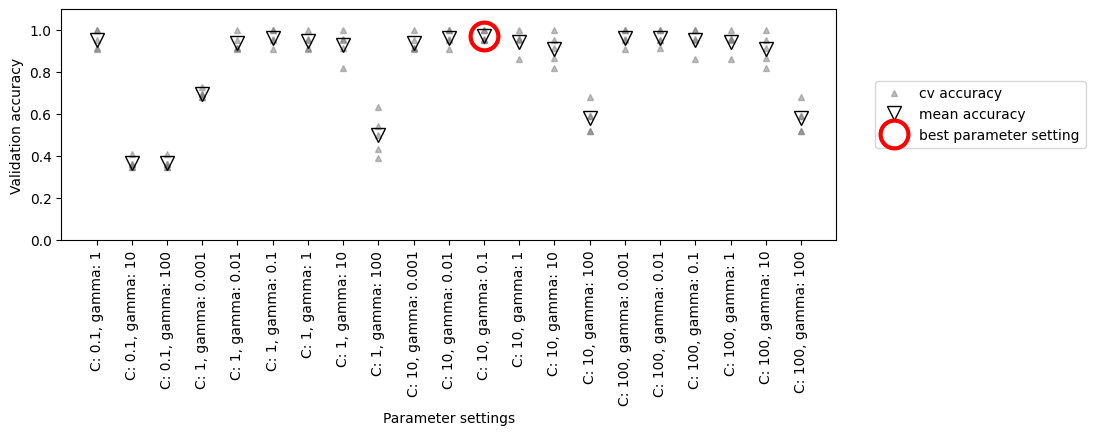

In [207]:
 mglearn.plots.plot_cross_val_selection()

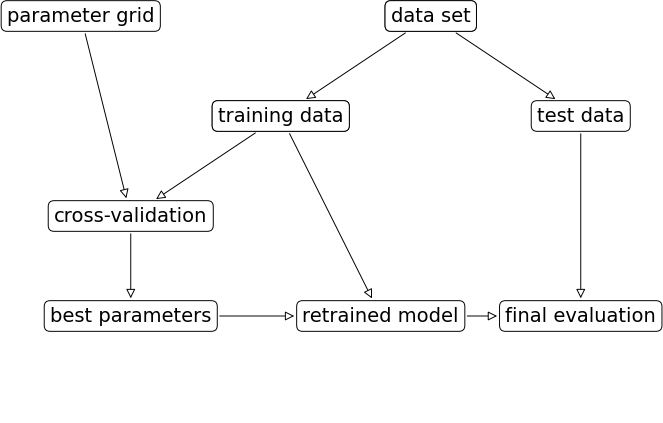

In [208]:
mglearn.plots.plot_grid_search_overview()

In [209]:
 param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
 print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [210]:
 from sklearn.model_selection import GridSearchCV
 from sklearn.svm import SVC
 grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [211]:
 X_train, X_test, y_train, y_test = train_test_split(
 iris.data, iris.target, random_state=0)

In [212]:
grid_search.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.001, 0.01, ...], 'gamma': [0.001, 0.01, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [213]:
 print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [214]:
 print("Best parameters: {}".format(grid_search.best_params_))
 print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [215]:
 print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


###  Analyzing the result of cross-validation

In [216]:
 import pandas as pd
 # convert to DataFrame
 results = pd.DataFrame(grid_search.cv_results_)
 # show the first 5 rows
 display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004625,0.003968,0.009965,0.018208,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.002987,0.003017,0.001134,0.002267,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.001806,0.003235,0.001500,0.003001,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000000,0.000000,0.003025,0.006051,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.005905,0.007249,0.000699,0.001103,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


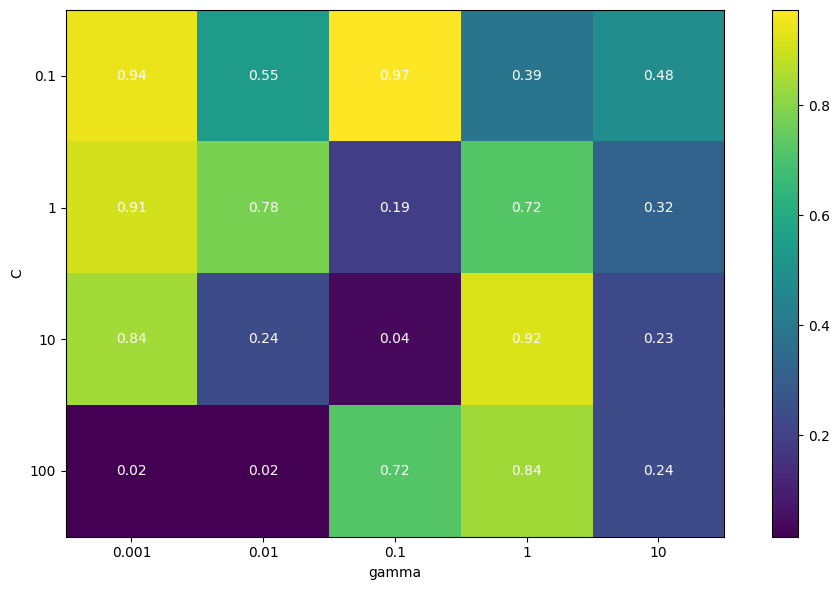

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
scores = np.random.rand(4, 5)  # Replace with your actual scores array
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(scores, cmap="viridis")

# Set axis labels and ticks
ax.set_xticks(np.arange(len(param_grid['gamma'])))
ax.set_yticks(np.arange(len(param_grid['C'])))
ax.set_xticklabels(param_grid['gamma'])
ax.set_yticklabels(param_grid['C'])
ax.set_xlabel('gamma')
ax.set_ylabel('C')

# Annotate each cell with the numeric value
for i in range(scores.shape[0]):
    for j in range(scores.shape[1]):
        ax.text(j, i, f"{scores[i, j]:.2f}", ha="center", va="center", color="w")

plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()


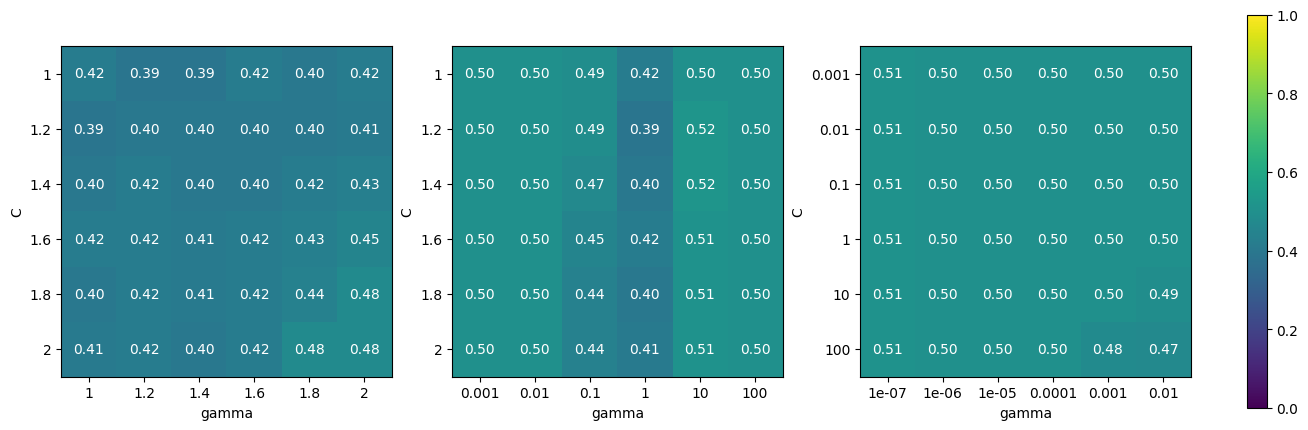

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Example synthetic data
X_train = np.random.rand(100, 5)
y_train = np.random.randint(0, 2, 100)

# Create subplots with constrained layout to avoid layout conflicts
fig, axes = plt.subplots(1, 3, figsize=(13, 5), constrained_layout=True)

param_grids = [
    {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)},
    {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)},
    {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}
]

vmin, vmax = 0, 1

for param_grid, ax in zip(param_grids, axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Determine correct shape
    scores = grid_search.cv_results_['mean_test_score']
    c_len = len(param_grid['C'])
    g_len = len(param_grid['gamma'])
    scores = np.array(scores).reshape(c_len, g_len)
    
    im = ax.imshow(scores, cmap="viridis", vmin=vmin, vmax=vmax)
    ax.set_xlabel('gamma')
    ax.set_ylabel('C')
    ax.set_xticks(np.arange(g_len))
    ax.set_yticks(np.arange(c_len))
    ax.set_xticklabels([f"{g:.3g}" for g in param_grid['gamma']])
    ax.set_yticklabels([f"{c:.3g}" for c in param_grid['C']])
    for i in range(c_len):
        for j in range(g_len):
            ax.text(j, i, f"{scores[i, j]:.2f}", ha="center", va="center", color="w")

# Shared colorbar across all axes
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
plt.show()


### Search over spaces that are not grids

In [219]:
 param_grid = [{'kernel': ['rbf'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
 print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [220]:
 grid_search = GridSearchCV(SVC(), param_grid, cv=5)
 grid_search.fit(X_train, y_train)
 print("Best parameters: {}".format(grid_search.best_params_))
 print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Best cross-validation score: 0.52


In [221]:
results = pd.DataFrame(grid_search.cv_results_)
 # we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.002231,0.002134,0.000607,0.000865,0.002841,0.0,0.002064,0.0,0.002013,0.001447,...,0.000665,0.003961,0.001032,0.001621,0.002069,0.001201,0.002478,0.002583,0.00134,0.002729
std_fit_time,0.003006,0.00313,0.000807,0.001063,0.004737,0.0,0.003219,0.0,0.001783,0.001241,...,0.000879,0.002412,0.000902,0.000811,0.001272,0.001598,0.002804,0.003007,0.001119,0.003754
mean_score_time,0.00128,0.0,0.002526,0.000493,0.001941,0.001066,0.000404,0.000725,0.001311,0.002352,...,0.001525,0.000805,0.00121,0.001608,0.000362,0.000404,0.000506,0.001209,0.001092,0.002125
std_score_time,0.001661,0.0,0.003282,0.00062,0.001161,0.001369,0.000808,0.001451,0.000877,0.002208,...,0.001284,0.000986,0.000988,0.002088,0.000723,0.000807,0.000781,0.000987,0.001939,0.00425
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100.0,100.0,100.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0
param_gamma,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,...,0.1,1.0,10.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.25,0.55,0.5,0.5,0.5,0.5,0.5,0.2,0.25,0.25
split1_test_score,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.4,0.4,0.65,0.45,0.5,0.5,0.5,0.55,0.55,0.6


###  Nested cross-validation

In [222]:
 scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
 iris.data, iris.target, cv=5)
 print("Cross-validation scores: ", scores)
 print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


In [223]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
  outer_scores = []
 # for each split of the data in the outer cross-validation
 # (split method returns indices)
  for training_samples, test_samples in outer_cv.split(X, y):
 # find best parameter using inner cross-validation
   best_parms = {}
   best_score = -np.inf
 # iterate over parameters
   for parameters in parameter_grid:
 # accumulate score over inner splits
    cv_scores = []
 # iterate over inner cross-validation
    for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
 # build classifier given parameters and training data
     clf = Classifier(**parameters)
     clf.fit(X[inner_train], y[inner_train])
 # evaluate on inner test set
     score = clf.score(X[inner_test], y[inner_test])
     cv_scores.append(score)
 # compute mean score over inner folds
    mean_score = np.mean(cv_scores)
    if mean_score > best_score:
 # if better than so far, remember parameters
     best_score = mean_score
     best_params = parameters
 # build classifier on best parameters using outer training set
   clf = Classifier(**best_params)
   clf.fit(X[training_samples], y[training_samples])
 # evaluate
  outer_scores.append(clf.score(X[test_samples], y[test_samples]))
  return np.array(outer_scores)

In [224]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

# Load data
iris = load_iris()

# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

# Define inner and outer cross-validation strategies
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Define the model and grid search
svc = SVC()
clf = GridSearchCV(estimator=svc, param_grid=param_grid, cv=inner_cv)

# Run nested cross-validation
nested_scores = cross_val_score(clf, iris.data, iris.target, cv=outer_cv)

print("Cross-validation scores: {}".format(nested_scores))
print("Mean score: {:.3f} (std: {:.3f})".format(nested_scores.mean(), nested_scores.std()))


Cross-validation scores: [0.93333333 1.         0.93333333 1.         0.93333333]
Mean score: 0.960 (std: 0.033)


# Evaluation Metrics and Scoring

## Metrics for Binary Classification

### Imbalanced datasets

In [225]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, y, random_state=0)

In [226]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [227]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [228]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1 , max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.90
logreg score: 0.98


## Confusion matrices

In [229]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


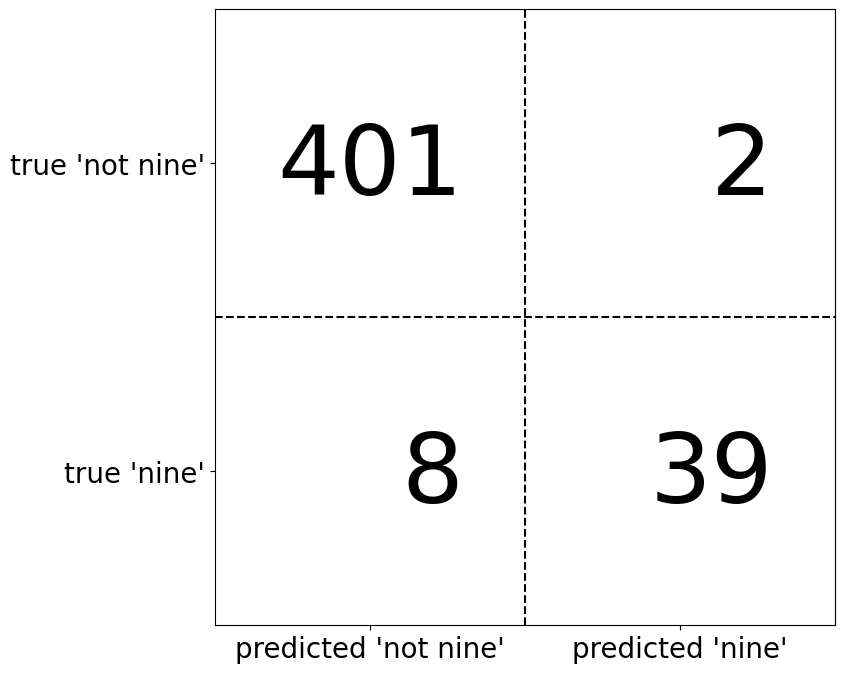

In [230]:
mglearn.plots.plot_confusion_matrix_illustration()

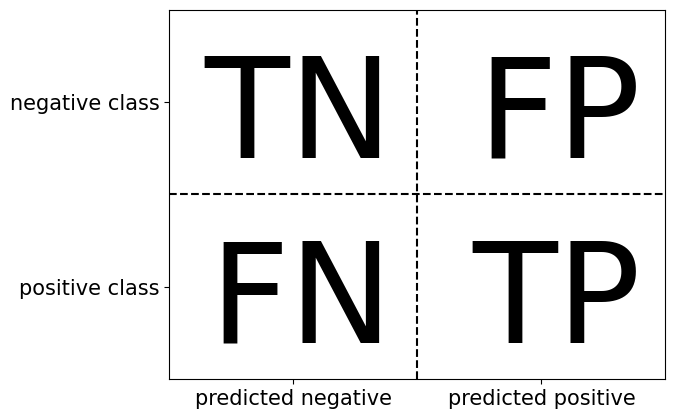

In [231]:
mglearn.plots.plot_binary_confusion_matrix()

In [232]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


## Relation to accuracy.
- We already saw one way to summarize the result in the confu‐sion matrix—by computing accuracy, which can be expressed as:

                        TP+TN
-          Accuracy = ---------------
                   TP+TN + FP + FN

                          TP
-          Precision = -------------------
                         TP+FP

                          TP
 -         Recall = -------------------
                         TP+FN
       
                       precision·recall
-          F = 2. ------------------------- 
                      precision+recall

In [233]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
 f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
 f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [234]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent,
    target_names=["not nine", "nine"], zero_division=0))


              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [235]:
print(classification_report(y_test, pred_dummy,
 target_names=["not nine", "nine"] , zero_division=0))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [236]:
print(classification_report(y_test, pred_logreg,
 target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



### Taking uncertainty into account

X shape: (450, 2)
y shape: (450,)


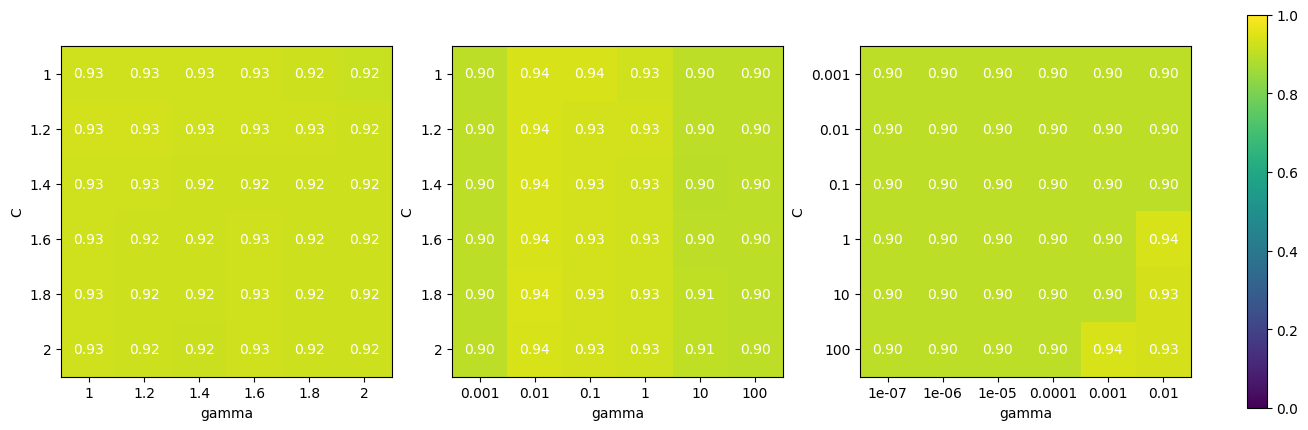

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

# 1. Generate blob data with matching sample sizes and centers
from mglearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=(400, 50),
    centers=[[-5, 0], [5, 0]],  # explicit 2D centers
    cluster_std=[7.0, 2],
    random_state=22
)
print("X shape:", X.shape)  # (450, 2)
print("y shape:", y.shape)  # (450,)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3. Fit SVC
svc = SVC(gamma=.05).fit(X_train, y_train)

# 4. (Optional) Grid Search with heatmap visualization
param_grids = [
    {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)},
    {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)},
    {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}
]

fig, axes = plt.subplots(1, 3, figsize=(13, 5), constrained_layout=True)
vmin, vmax = 0, 1  # Adjust as needed

for param_grid, ax in zip(param_grids, axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    im = ax.imshow(scores, cmap="viridis", vmin=vmin, vmax=vmax)
    ax.set_xlabel('gamma')
    ax.set_ylabel('C')
    ax.set_xticks(np.arange(6))
    ax.set_yticks(np.arange(6))
    ax.set_xticklabels([f"{g:.3g}" for g in param_grid['gamma']])
    ax.set_yticklabels([f"{c:.3g}" for c in param_grid['C']])
    for i in range(6):
        for j in range(6):
            ax.text(j, i, f"{scores[i, j]:.2f}", ha="center", va="center", color="w")

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
plt.show()


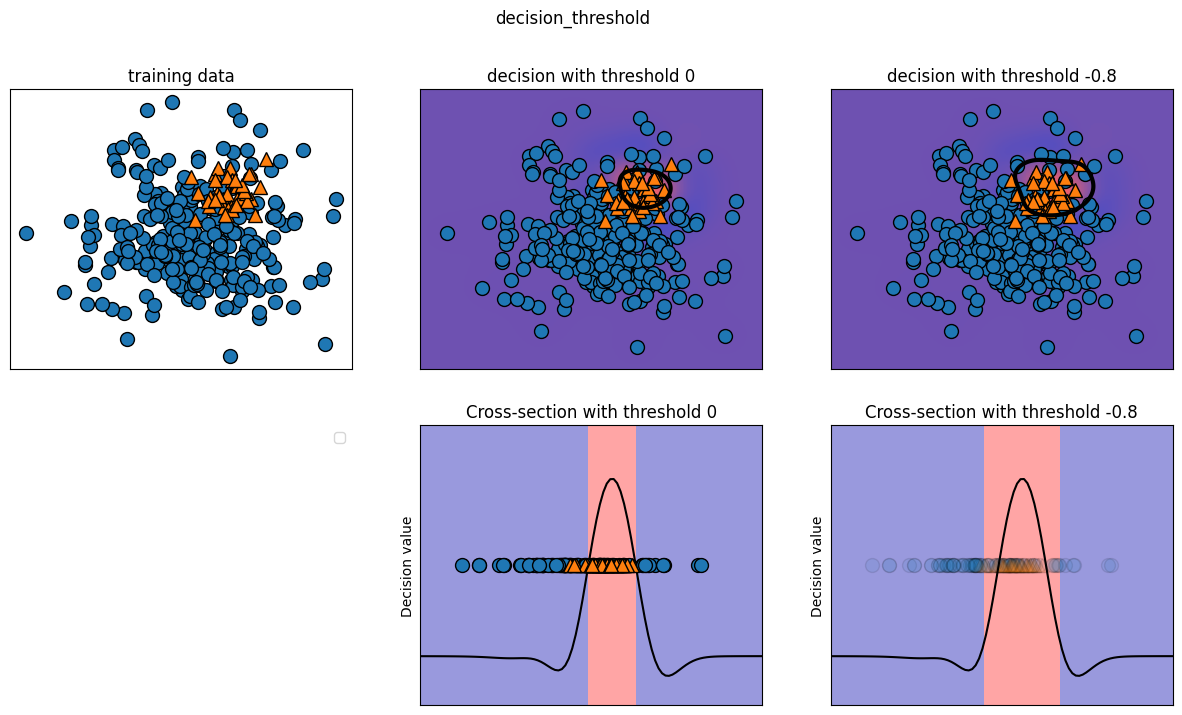

In [238]:
import mglearn
mglearn.plots.plot_decision_threshold()

In [239]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        96
           1       0.71      0.59      0.65        17

    accuracy                           0.90       113
   macro avg       0.82      0.77      0.79       113
weighted avg       0.90      0.90      0.90       113



In [240]:
y_pred_lower_threshold = svc.decision_function(X_test) 

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

# Generate sample binary classification data
X, y = make_classification(n_samples=500, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Get predicted probabilities for class 1
y_proba = clf.predict_proba(X_test)[:, 1]

# Apply custom threshold
y_pred_lower_threshold = (y_proba >= 0.3).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred_lower_threshold))


              precision    recall  f1-score   support

           0       0.90      0.87      0.89        62
           1       0.88      0.90      0.89        63

    accuracy                           0.89       125
   macro avg       0.89      0.89      0.89       125
weighted avg       0.89      0.89      0.89       125



### Precision-recall curves and ROC curves

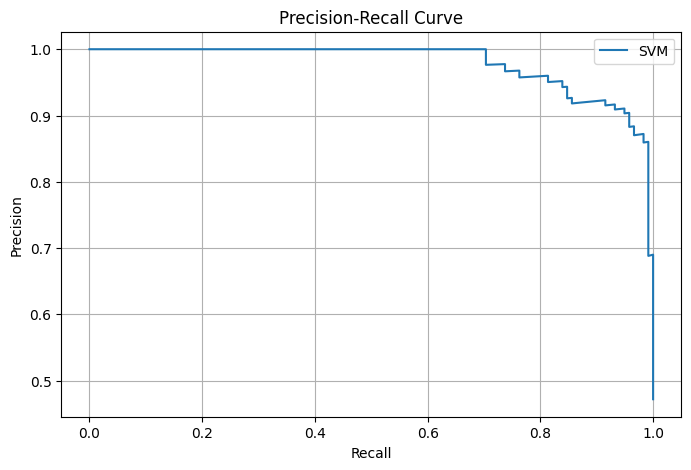

Classification Report (Threshold = 0):
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       132
           1       0.88      0.96      0.92       118

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [242]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, classification_report

# Step 1: Generate synthetic dataset with 20 features
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_informative=15, n_redundant=5,
                           random_state=42)

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Step 3: Train SVM with decision_function enabled
svc = SVC(kernel='rbf', probability=False)  # No need for probability=True if using decision_function
svc.fit(X_train, y_train)

# Step 4: Get decision function scores for test set
decision_scores = svc.decision_function(X_test)

# Step 5: Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, decision_scores)

# Step 6: Plot the curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label="SVM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

# Optional: classification report with default threshold
y_pred = svc.predict(X_test)
print("Classification Report (Threshold = 0):")
print(classification_report(y_test, y_pred))


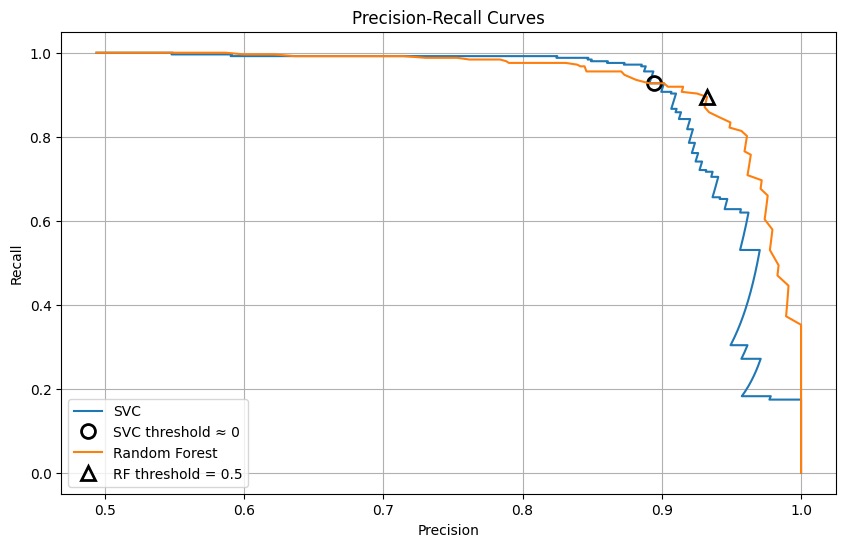

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

# STEP 1: Create synthetic classification data
X, y = make_classification(n_samples=2000, n_features=20, n_informative=5,
                           n_redundant=2, random_state=42)

# STEP 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# STEP 3: Train SVC
svc = SVC(gamma=0.05, probability=True).fit(X_train, y_train)
precision_svc, recall_svc, thresholds_svc = precision_recall_curve(
    y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds_svc))  # Find threshold closest to 0

# STEP 4: Train RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))  # Closest to 0.5

# STEP 5: Plot both precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(precision_svc, recall_svc, label="SVC")
plt.plot(precision_svc[close_zero], recall_svc[close_zero], 'o', markersize=10,
         label="SVC threshold ≈ 0", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="Random Forest")
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="RF threshold = 0.5", fillstyle="none", mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision-Recall Curves")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [255]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

# Provide explicit coordinates for 2 centers (2D features)
centers = [[-5, 0], [5, 0]]  # Can be adjusted

# Generate synthetic dataset
X, y = make_blobs(
    n_samples=[4000, 500],
    centers=centers,
    cluster_std=[7.0, 2.0],
    random_state=22
)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (4500, 2)
y shape: (4500,)


In [271]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

# Generate 2D data
X, y = make_blobs(n_samples=[4000, 500], centers=[[0, 0], [10, 10]], cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train both models on the same 2D dataset
rf = RandomForestClassifier(n_estimators=100, random_state=0)
svc = SVC(gamma=0.05, probability=True)  # enable probability for svc

rf.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Compute average precision scores
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.predict_proba(X_test)[:, 1])
print("f1_score of random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test), average='macro')))
print("f1_score of svc: {:.3f}".format(
    f1_score(y_test, svc.predict(X_test), average='macro')))


f1_score of random forest: 0.922
f1_score of svc: 0.932


In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

# Generate 2D data
X, y = make_blobs(n_samples=[4000, 500], centers=[[0, 0], [10, 10]], cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train both models on the same 2D dataset
rf = RandomForestClassifier(n_estimators=100, random_state=0)
svc = SVC(gamma=0.05, probability=True)  # enable probability for svc

rf.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Compute average precision scores
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.predict_proba(X_test)[:, 1])

print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of SVC: {:.3f}".format(ap_svc))


Average precision of random forest: 0.855
Average precision of SVC: 0.878


### Receiver operating characteristics (ROC) and AUC

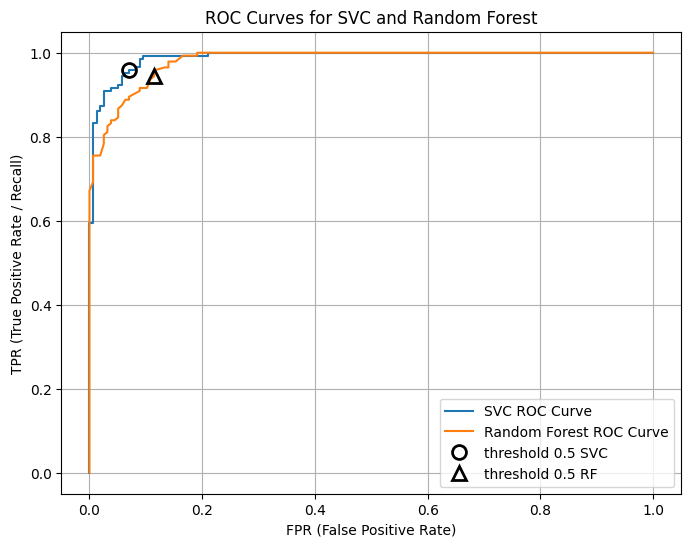

In [280]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # For creating a sample dataset

# Generate a sample dataset (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVC model
svc = SVC(random_state=42, probability=True) # Set probability=True for predict_proba
svc.fit(X_train, y_train)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Calculate ROC curve for SVC
# Use predict_proba to get probabilities for the positive class (class 1)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc.predict_proba(X_test)[:, 1])

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))

# Plot ROC curve for SVC
plt.plot(fpr_svc, tpr_svc, label="SVC ROC Curve")

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")

# Find the threshold closest to 0 for SVC (or another relevant threshold)
close_zero_idx_svc = np.argmin(np.abs(thresholds_svc - 0.5)) # Example: find threshold closest to 0.5
plt.plot(fpr_svc[close_zero_idx_svc], tpr_svc[close_zero_idx_svc], 'o', markersize=10,
         label="threshold 0.5 SVC", fillstyle="none", c='k', mew=2)

# Find the threshold closest to 0.5 for Random Forest
close_default_rf_idx = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf_idx], tpr_rf[close_default_rf_idx], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate / Recall)")
plt.title("ROC Curves for SVC and Random Forest")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [279]:
from sklearn.metrics import roc_auc_score
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVC model
svc = SVC(random_state=42, probability=True) # Set probability=True for predict_proba
svc.fit(X_train, y_train)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.981
AUC for SVC: 0.990


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


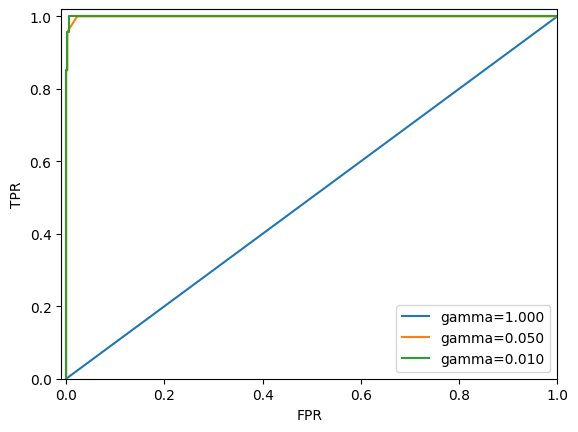

In [277]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
 svc = SVC(gamma=gamma).fit(X_train, y_train)
 accuracy = svc.score(X_test, y_test)
 auc = roc_auc_score(y_test, svc.decision_function(X_test))
 fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
 print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
 gamma, accuracy, auc))
 plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

# Metrics for Multiclass Classification

In [261]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


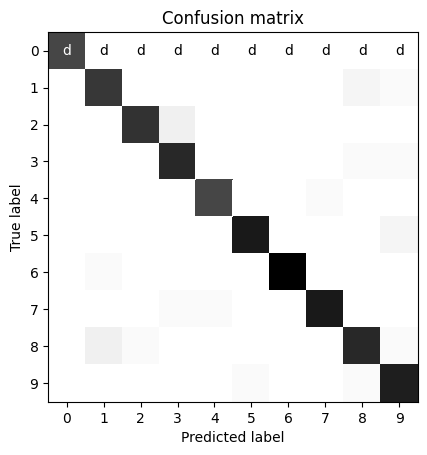

In [262]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import mglearn

# Load digits dataset
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)

# Train classifier
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict on test set
pred = model.predict(X_test)

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, pred)

# Visualize using mglearn's heatmap
scores_image = mglearn.tools.heatmap(
    cm,
    xlabel='Predicted label',
    ylabel='True label',
    xticklabels=digits.target_names,
    yticklabels=digits.target_names,
    cmap=plt.cm.gray_r,
    fmt="d"
)
plt.title("Confusion matrix")
plt.gca().invert_yaxis()
plt.show()


In [263]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [264]:
print("Micro average f1 score: {:.3f}".format
 (f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format
 (f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


# Regression Metrics

## Using Evaluation Metrics in Model Selection

In [265]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(
 cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
 scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,
 scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [266]:
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, digits.target == 9, random_state=0)
# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
 roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [267]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
 roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


In [268]:
from sklearn.metrics import get_scorer_names
print('Available scorers:\n{}'.format(sorted(get_scorer_names())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_max_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro